In [165]:
# imports

import re
import nltk
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd

## 1) Implement BPE Algorithm

In [65]:
class BPETokenizer:
    def __init__(self):
        self.vocab = []
        self.merge_counts = []

    def preprocess(self, text):
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\n+', ' ', text)
        return text

    def build_vocab(self, text):
        words = self.preprocess(text).split(' ')
        word_counts = defaultdict(int)

        for word in words:
            word_counts[word] += 1

        for word in list(word_counts.keys()):
            word_counts[word + '_'] = word_counts[word]
            del word_counts[word]

        unique_words = list(word_counts.keys())

        for word in unique_words:
            self.vocab.extend(list(word))

        self.vocab = list(set(self.vocab))

        return {word: list(word) for word in unique_words}, word_counts

    def get_max_pair(self, splits, counts):
        pair_counts = defaultdict(int)

        for word, freq in counts.items():
            split = splits[word]
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1])
                pair_counts[pair] += freq

        if not pair_counts:
            return None, 1

        max_pair = max(pair_counts, key=pair_counts.get)
        return max_pair, pair_counts[max_pair]

    def merge_splits(self, splits, pair):
        for word in splits:
            split = splits[word]
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    split[i] = pair[0] + pair[1]
                    del split[i + 1]
                else:
                    i += 1
        return splits

    def train(self, text, num_merges=2000):
        splits, counts = self.build_vocab(text)

        for _ in range(num_merges):
            pair, count = self.get_max_pair(splits, counts)
            if count == 1:
                break
            self.vocab.append(pair)
            self.merge_counts.append(count)
            splits = self.merge_splits(splits, pair)

    def tokenize(self, text):
        words = self.preprocess(text).split(' ')
        splits = {word + '_': list(word + '_') for word in words}

        for pair in self.vocab:
            if isinstance(pair, tuple):
                splits = self.merge_splits(splits, pair)

        tokens = [token for word in words for token in splits[word + '_']]
        return tokens

    def detokenize(self, tokens):
        text = ''.join(tokens)
        text = re.sub(r'_', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        return text.strip()


# Example usage
tokenizer = BPETokenizer()
train_text = "low low low low low lowest lowest newer newer newer newer newer newer wider wider wider new new"
tokenizer.train(train_text)

test_text = "newest widest lower"
tokens = tokenizer.tokenize(test_text)
decoded_text = tokenizer.detokenize(tokens)

print("Vocabulary:", tokenizer.vocab)
print("Tokenized text:", tokens)
print("Decoded text:", decoded_text)

Vocabulary: ['s', 'l', 'i', 'd', '_', 't', 'o', 'w', 'n', 'r', 'e', ('e', 'r'), ('er', '_'), ('n', 'e'), ('ne', 'w'), ('l', 'o'), ('lo', 'w'), ('new', 'er_'), ('low', '_'), ('w', 'i'), ('wi', 'd'), ('wid', 'er_'), ('low', 'e'), ('lowe', 's'), ('lowes', 't'), ('lowest', '_'), ('new', '_')]
Tokenized text: ['new', 'e', 's', 't', '_', 'wid', 'e', 's', 't', '_', 'low', 'er_']
Decoded text: newest widest lower


## 2) Train on NLTK Datasets

In [66]:
# Download the NLTK Gutenberg Corpus
nltk.download('gutenberg')

# Import the Gutenberg Corpus module
from nltk.corpus import gutenberg

# Get the list of available books in the Gutenberg Corpus
book_list = gutenberg.fileids()

# Print the list of available books
print("Available Books:")
for book in book_list:
    print(book)

# Load a specific book (e.g., "shakespeare-hamlet.txt")
shakespeare = gutenberg.raw('shakespeare-hamlet.txt')
austen = gutenberg.raw('austen-emma.txt')
blake = gutenberg.raw('blake-poems.txt')

# Display the first 500 characters of the selected book
print("\nSample Text from 'shakespeare-hamlet.txt':")
print(shakespeare[:500])

# Lets train bpe on shakespeare hamlet
bpe = BPETokenizer()
bpe.train(' '.join([shakespeare, austen, blake]))
print('vocab is ====\n', bpe.vocab[1:100])

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\vikra\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Available Books:
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt

Sample Text from 'shakespeare-hamlet.txt':
[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not
vocab is ====
 ['z', 'o', 'G', 'V', 'F', 'j', 'T', '4', 'B', 'E', 'h', 'R

## 3) Test on NLTK Datasets

In [59]:
frankenstein = open('frankenstein.txt', encoding="utf8").read()
dracula = open('dracula.txt', encoding="utf8").read()
holmes = open('sherlock_holmes.txt', encoding="utf8").read()

In [67]:
frank_encoded = bpe.tokenize(frankenstein)
dracula_encoded = bpe.tokenize(dracula)
holmes_encoded = bpe.tokenize(holmes)

In [68]:
bpe.detokenize(frank_encoded[0:500])

'Letter 1 St. Petersburgh, Dec. 11th, 17-- TO Mrs. Saville, England You will rejoice to hear that no disaster has accompanied the commencement of an enterprise which you have regarded with such evil forebodings. I arrived here yesterday, and my first task is to assure my dear sister of my welfare and increasing confidence in the success of my undertaking. I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. Do you understand this feeling? This breeze, which has travelled from the regions towards which I am advancing, gives me a foretaste of those icy climes. Inspirited by this wind of promise, my daydreams become more fervent and vivid. I try in vain to be persuaded that the pole is the seat of frost and desolation; it ever presents itself to my imagination as the region of beauty and delight. There, Margaret, the sun is forever visible, its broad disk just ski

## 4) Creating Reference Tokenization

In [53]:
test_books = {'frankenstein': frankenstein, 'dracula': dracula, 'holmes': holmes}
for book in test_books:    
    punkt_tokenized_sentences = nltk.sent_tokenize(test_books[book])
    punkt_tokenized_words = nltk.word_tokenize(test_books[book])
    with open(f'punkt_tokenized_sentence_{book}.txt', 'w', encoding="utf8") as f:
        for sentence in punkt_tokenized_sentences:
            f.write(sentence)
    with open(f'punkt_tokenized_words_{book}.txt', 'w', encoding="utf8") as f:
        for word in punkt_tokenized_words:
            f.write(word)

## 5) Comparing with Standard Tokenization

In [69]:
nltk_frankenstein = nltk.word_tokenize(frankenstein)
nltk_dracula = nltk.word_tokenize(dracula)
nltk_holmes = nltk.word_tokenize(holmes)

In [139]:
def token_length_frequency(tokens):
    token_length = {}
    for i in tokens:
        token_length[len(i)] = token_length.get(len(i), 0) + 1
    return token_length

def calculate_performance(nltk_tokens, bpe_tokens):
    
    bpe_tokens_final = []
    
    for i in bpe_tokens:
        if i=='_':
            continue
        elif (i[-1] == '_' and len(i) > 1):
            bpe_tokens_final.append(i[:-1])
        else:
            bpe_tokens_final.append(i)

    unique_bpe_tokens, unique_nltk_tokens = set(bpe_tokens_final), set(nltk_tokens)    
    correct_tokens=sum(token in unique_bpe_tokens for token in nltk_tokens)
    
    true_positives = len(unique_bpe_tokens.intersection(unique_nltk_tokens))
    false_positives = len(unique_bpe_tokens.difference(unique_nltk_tokens))
    false_negatives = len(unique_nltk_tokens.difference(unique_bpe_tokens))
 
    
    accuracy = (correct_tokens / len(nltk_tokens))*100
    tokenization_coverage = (len(set(bpe_tokens_final)) / len(set(nltk_tokens))) * 100    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * precision * recall / (precision + recall)    
    jaccard_similarity = len(unique_bpe_tokens.intersection(unique_nltk_tokens)) / len(unique_bpe_tokens.union(unique_nltk_tokens))
    
    return accuracy, tokenization_coverage, precision, recall, f1_score, jaccard_similarity,token_length_frequency(bpe_tokens_final),token_length_frequency(nltk_tokens)

        

In [168]:
frankenstein_performance = calculate_performance(nltk_frankenstein, frank_encoded)
dracula_performance = calculate_performance(nltk_dracula, dracula_encoded)
holmes_performance = calculate_performance(nltk_holmes, holmes_encoded)

performance_table={
    "Measure":[],
    "Accuracy":[],
    "Tokenization Coverage":[],
    "Precision":[],
    "Recall":[],
    "F1-Score":[],
    "Jaccard Similarity":[]     
}

for measure, performance in zip(['Frankenstein', 'Dracula', 'Holmes'],[frankenstein_performance, dracula_performance, holmes_performance]):
    performance_table["Measure"].append(measure)
    performance_table["Accuracy"].append(performance[0])
    performance_table["Tokenization Coverage"].append(performance[1])
    performance_table["Precision"].append(performance[2])
    performance_table["Recall"].append(performance[3])
    performance_table["F1-Score"].append(performance[4])
    performance_table["Jaccard Similarity"].append(performance[5])
    
performance_overall=pd.DataFrame(performance_table)
performance_overall

,Measure,Accuracy,Tokenization Coverage,Precision,Recall,F1-Score,Jaccard Similarity
0,Frankenstein,69.955766,21.736231,0.365644,0.079477,0.130573,0.069846
1,Dracula,76.698735,14.665493,0.412965,0.060563,0.105635,0.055763
2,Holmes,75.290383,16.370142,0.403157,0.065997,0.113427,0.060123


## 6) Visualizations

#### Evolution of vocabulary and Frequency of Byte-Pair Merges

Text(0.5, 1.0, 'Evolution of vocabulary and Frequency of Byte-Pair Merges')

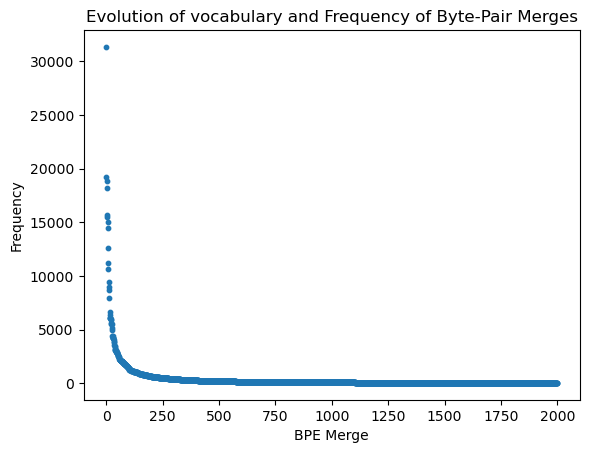

In [135]:
bpe_merges = [i for i in bpe.vocab if type(i)==tuple]
plt.scatter(range(len(bpe_merges [0:5000])), bpe.merge_counts[0:5000], s=10)
plt.xlabel('BPE Merge')
plt.ylabel('Frequency')
plt.title('Evolution of vocabulary and Frequency of Byte-Pair Merges')

### Histogram of standard token length vs bpe token length

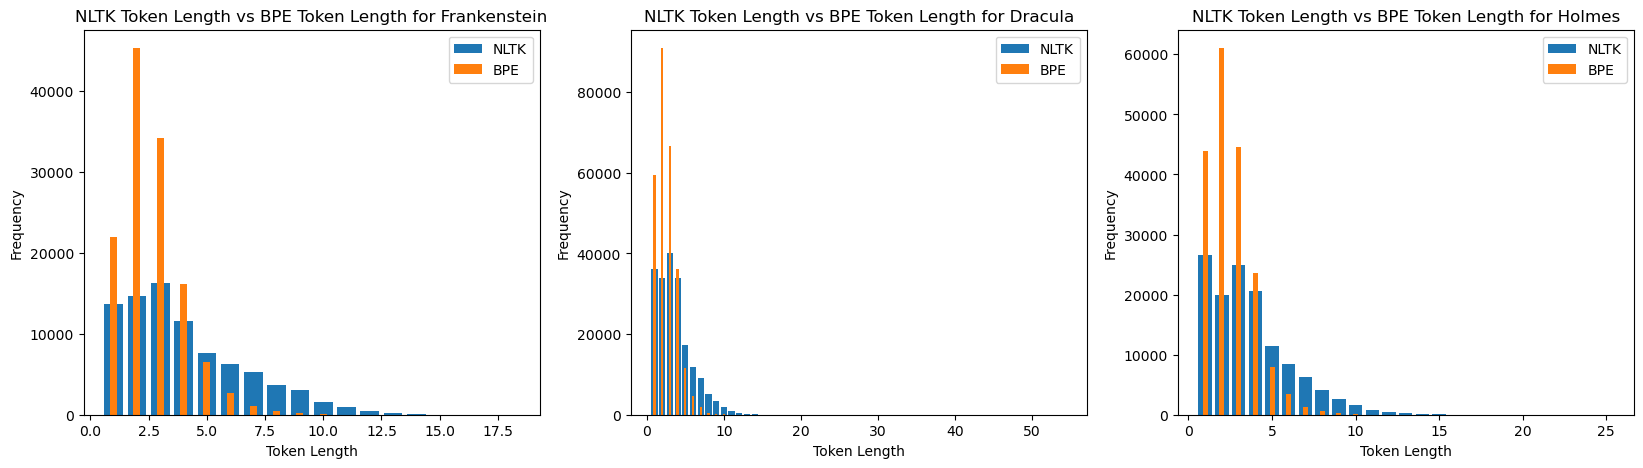

In [163]:
plt.figure(figsize=(20,5))


plt.subplot(1, 3, 1)
plt.bar(list(calculate_performance(nltk_frankenstein, frank_encoded)[7].keys()), calculate_performance(nltk_frankenstein, frank_encoded)[7].values(),width=0.8, label='NLTK')
plt.bar(list(calculate_performance(nltk_frankenstein, frank_encoded)[6].keys()), calculate_performance(nltk_frankenstein, frank_encoded)[6].values(),width=0.3, label='BPE')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Token Length')
plt.title('NLTK Token Length vs BPE Token Length for Frankenstein')

plt.subplot(1, 3, 2)
plt.bar(list(calculate_performance(nltk_dracula, dracula_encoded)[7].keys()), calculate_performance(nltk_dracula, dracula_encoded)[7].values(),width=0.8, label='NLTK')
plt.bar(list(calculate_performance(nltk_dracula, dracula_encoded)[6].keys()), calculate_performance(nltk_dracula, dracula_encoded)[6].values(),width=0.3, label='BPE')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Token Length')
plt.title('NLTK Token Length vs BPE Token Length for Dracula')

plt.subplot(1, 3, 3)
plt.bar(list(calculate_performance(nltk_holmes, holmes_encoded)[7].keys()), calculate_performance(nltk_holmes, holmes_encoded)[7].values(),width=0.8, label='NLTK')
plt.bar(list(calculate_performance(nltk_holmes, holmes_encoded)[6].keys()), calculate_performance(nltk_holmes, holmes_encoded)[6].values(),width=0.3, label='BPE')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Token Length')
plt.title('NLTK Token Length vs BPE Token Length for Holmes')


plt.show()

### Top 10 BPE Merges

In [164]:
bpe_merges[0:10]

[('e', '_'),
 ('t', '_'),
 ('t', 'h'),
 ('d', '_'),
 ('e', 'r'),
 ('s', '_'),
 (',', '_'),
 ('i', 'n'),
 ('a', 'n'),
 ('y', '_')]